In [1]:
## Import required libraries
import pandas as pd
import numpy as np
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

%matplotlib inline
sns.set()

In [2]:
import random
random.seed(123)

In [3]:
names = ['buying_price', 'maintainance_price', 'num_doors', 'num_persons', 'boot_size', 'safety_level', 'class']
data = pd.read_csv('car.data', names = names, header = None)

In [4]:
data.shape

(1728, 7)

In [5]:
data.head()

,buying_price,maintainance_price,num_doors,num_persons,boot_size,safety_level,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.isnull().sum()

buying_price          0
maintainance_price    0
num_doors             0
num_persons           0
boot_size             0
safety_level          0
class                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   buying_price        1728 non-null   object
 1   maintainance_price  1728 non-null   object
 2   num_doors           1728 non-null   object
 3   num_persons         1728 non-null   object
 4   boot_size           1728 non-null   object
 5   safety_level        1728 non-null   object
 6   class               1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
ord_enc = OrdinalEncoder()
data[['num_doors', 'num_persons']] = ord_enc.fit_transform(data[['num_doors', 'num_persons']])

In [10]:
data.head()

,buying_price,maintainance_price,num_doors,num_persons,boot_size,safety_level,class
0,vhigh,vhigh,0,0,small,low,unacc
1,vhigh,vhigh,0,0,small,med,unacc
2,vhigh,vhigh,0,0,small,high,unacc
3,vhigh,vhigh,0,0,med,low,unacc
4,vhigh,vhigh,0,0,med,med,unacc


In [11]:
data.isnull().sum()

buying_price          0
maintainance_price    0
num_doors             0
num_persons           0
boot_size             0
safety_level          0
class                 0
dtype: int64

In [12]:
np.unique(data['num_persons'])

array([0.0, 1.0, 2.0], dtype=object)

In [13]:
np.unique(data['num_doors'])

array([0.0, 1.0, 2.0, 3.0], dtype=object)

In [14]:
for col in set(data.columns) - set(['num_doors', 'num_persons']):
    data[col], _ = data[col].factorize()

In [15]:
data.head()

,buying_price,maintainance_price,num_doors,num_persons,boot_size,safety_level,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [16]:
X = data.drop(labels = 'class', axis = 1)
y = data['class']

In [17]:
X.corr()

,buying_price,maintainance_price,boot_size,safety_level
buying_price,1.0,0.0,0.0,0.0
maintainance_price,0.0,1.0,0.0,0.0
boot_size,0.0,0.0,1.0,0.0
safety_level,0.0,0.0,0.0,1.0


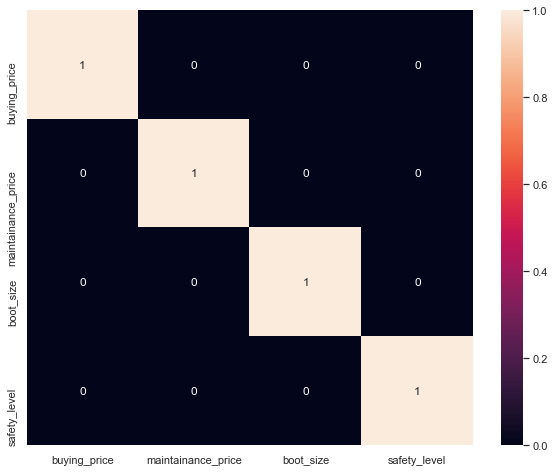

In [18]:
plt.figure(figsize = (10, 8))
sns.heatmap(X.corr(), annot = True, fmt = '.10g')
plt.show()

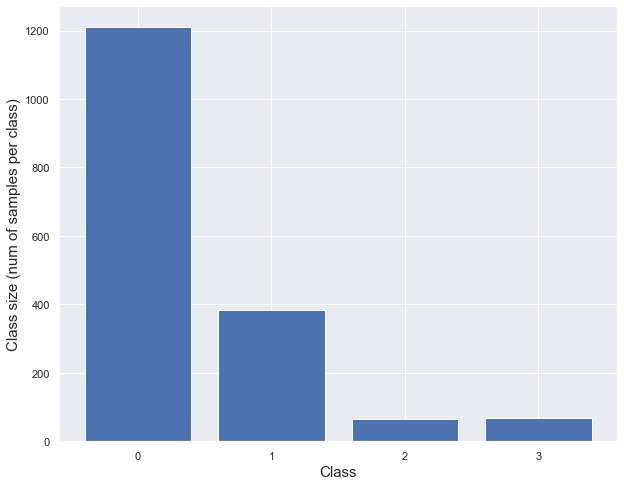

In [19]:
from collections import Counter

plt.figure(figsize = (10, 8))
plt.bar(x = [0, 1, 2, 3], height = [Counter(y)[0], Counter(y)[1], Counter(y)[2], Counter(y)[3]])
plt.xlabel('Class', fontdict = {'size' : 15})
plt.ylabel('Class size (num of samples per class)', fontdict = {'size' : 15})
plt.xticks(ticks = [0, 1, 2, 3], labels = [0, 1, 2, 3])
plt.show()

In [20]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split

In [21]:
bclf = BalancedBaggingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 123)

In [22]:
bclf.fit(X_train, y_train)

BalancedBaggingClassifier()

In [23]:
np.unique(y_test)

array([0, 1, 2, 3], dtype=int64)

In [24]:
from sklearn.metrics import classification_report, f1_score

In [25]:
print(classification_report(y_train, bclf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1089
           1       0.86      0.97      0.91       346
           2       0.98      1.00      0.99        58
           3       0.86      1.00      0.93        62

    accuracy                           0.96      1555
   macro avg       0.93      0.98      0.95      1555
weighted avg       0.96      0.96      0.96      1555



In [26]:
print(classification_report(y_test, bclf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       121
           1       0.87      0.89      0.88        38
           2       0.88      1.00      0.93         7
           3       0.64      1.00      0.78         7

    accuracy                           0.94       173
   macro avg       0.85      0.96      0.89       173
weighted avg       0.95      0.94      0.94       173



**Optimizing for best number of estimators**

In [27]:
test_f1_results = []
train_f1_results = []
n_estimators = np.arange(5, 100, 5)

for n_estimator in n_estimators:
    bclf = bclf.set_params(**{'n_estimators' : n_estimator})
    bclf.fit(X_train, y_train)
    
    f1_test = f1_score(y_test, bclf.predict(X_test), average = 'macro')
    f1_train = f1_score(y_train, bclf.predict(X_train), average = 'macro')
    
    test_f1_results.append(f1_test)
    train_f1_results.append(f1_train)

In [28]:
ix = np.argmax(test_f1_results)
ind = np.argmax(train_f1_results)

In [29]:
results_df = pd.DataFrame(data = {'n_estimators' : n_estimators,
                                  'Train scores' : train_f1_results,
                                  'Test scores' : test_f1_results,
                                  'Error' : list(np.array(train_f1_results) - np.array(test_f1_results))
                                 })

In [30]:
print(results_df)

    n_estimators  Train scores  Test scores     Error
0              5      0.933078     0.846278  0.086799
1             10      0.949092     0.876878  0.072213
2             15      0.947830     0.882270  0.065561
3             20      0.926742     0.849220  0.077522
4             25      0.955271     0.886315  0.068956
5             30      0.937133     0.885749  0.051384
6             35      0.949697     0.902620  0.047077
7             40      0.933113     0.858422  0.074691
8             45      0.934303     0.861413  0.072891
9             50      0.956449     0.900243  0.056206
10            55      0.947349     0.873310  0.074039
11            60      0.938951     0.873310  0.065641
12            65      0.940345     0.882270  0.058075
13            70      0.941859     0.892201  0.049658
14            75      0.941027     0.865311  0.075716
15            80      0.939748     0.869275  0.070473
16            85      0.937645     0.869275  0.068369
17            90      0.9388

In [31]:
idx = np.argmin(a = results_df['Error'])

In [32]:
print(f'Best n_estimators = {n_estimators[idx]}, Best F-measure train score = {train_f1_results[idx]}')
print(f'Best n_estimators = {n_estimators[idx]}, Best F-measure test score = {test_f1_results[idx]}')

Best n_estimators = 35, Best F-measure train score = 0.9496971680243382
Best n_estimators = 35, Best F-measure test score = 0.9026204752387298
